#### Fundamentos Data Science I 
_Udacity Jul/2018 - Juliano M Mendes_

# Projeto Titanic: Investigando uma base de dados kaggle

### Visão Geral do Projeto

Neste projeto, será analisado um conjunto de dados de passageiros do naufrágio do RMS Titanic e, em seguida, serão comunicadas conclusões sobre as análises realizadas. As bibliotecas utilizadas serão: NumPy, Pandas e Matplotlib.

### Resumo Histórico
O naufrágio do RMS Titanic é um dos mais notórios naufrágios da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou depois de colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Esta tragédia sensacional chocou a comunidade internacional e levou a melhores normas de segurança para os navios.

### Objetivo

**O objetivo deste projeto será responder aos seguintes questionamentos sobre os dados:**

1 - Quais foram os fatores que fizeram com que algumas pessoas mais propensas a sobreviver?  
2 - Será que a classe mais alta teve mais chances de sobrevivência que a mais baixa?  
3 - A proporção de sobrevivência da primeira classe foi superior em relação à segunda e a terceira classe?  
4 - Há correlação direta entre os que sobreviveram e seus gêneros?  
5 - Qual a proporção de sobreviventes e mortos por gênero?  
6 - Mulheres e crianças salvaram-se primeiro?  
7 - Há correlação direta entre o valor pago na passagem e idade?  
8 - Quem são os passageiros que não tiveram a tarifa cobrada? Eles sobreviveram?  

**Tendo como resultado de aprendizado:**

- Visão ampla dos passos envolvidos em um processo de análise de dados típico;
- Realização de questionamentos que podem ser respondidos por um conjunto de dados;
- Capacidade de investigar problemas em um conjunto de dados e confrontrar os dados em um formato que se possa usar;
- Adquirir prática em comunicar os resultados de sua análise;
- Ser capaz de utilizar as operações vetorizadas no NumPy e Pandas para acelerar código de análise de dados;
- Possuir familiaridade com objetos, séries e o banco de dados Pandas, para acesso aos dados de forma mais conveniente;
- Saber utilizar a biblioteca Matplotlib para produzir gráficos simples e objetivos.

***

### Obtendo o conjunto de dados

> **[Dados do Titanic](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59e4fe3d_titanic-data-6/titanic-data-6.csv)** - contém dados demográficos e informações de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic. Você pode ver uma descrição deste conjunto de dados no site do [Kaggle](https://www.kaggle.com/c/titanic/data#), de onde os dados foram tirados.

## Carregando os dados com Pandas (load data)

In [351]:
# Importando os pacotes e carregando os arquivos de titanic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_titanic = pd.read_csv('titanic-data-6.csv')

## Exploring Titanic Dataset (EDA with Visualizations)

### Análise Exploratória de dados do Titanic###

Nesta seção será analisado o conjunto de dados Titanic

### Data Dictionary

<table align="left">
  <tr>
    <th>Column</th>
    <th>Definition</th>
    <th>Key</th>
  </tr>
  <tr>
    <td>Survival</td>
    <td>Survival</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
  <tr>
    <td>Pclass</td>
    <td>Ticket class</td>
    <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>Sex</td>
    <td>male, famale</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Age in years</td>
    <td></td>
  </tr>
  <tr>
    <td>Sibsp</td>
    <td># of siblings / spouses aboard the Titanic</td>
    <td></td>
  </tr>
  <tr>
    <td>Parch</td>
    <td># of parents / children aboard the Titanic </td>
    <td></td>
  </tr>
  <tr>
    <td>Ticket</td>
    <td>icket number</td>
    <td></td>
  </tr>
  <tr>
    <td>Fare</td>
    <td>Passenger fare</td>
    <td></td>
  </tr>
  <tr>
    <td>Cabin</td>
    <td>Cabin number </td>
    <td></td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>Port of Embarkation</td>
        <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
  </tr>
</table>

***
### Variable Notes

A. **Pclass**: A proxy for socio-economic status (SES)  
  - 1st = Upper  
  - 2nd = Middle    
  - 3rd = Lower  

B. **Age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  

C. **Sibsp**: The dataset defines family relations in this way:  
  - Sibling = brother, sister, stepbrother, stepsister  
  - Spouse = husband, wife (mistresses and fiancés were ignored)
  
D. **Parch**: The dataset defines family relations in this way:  
  - Parent = mother, father  
  - Child = daughter, son, stepdaughter, stepson  
  - Some children travelled only with a nanny, therefore parch=0 for them.  
  
#### Esta amostra possui `891` registros obtidos do arquivo `titanic-data-6.csv`

### Organização do conjunto de dados
Informações gerais do conjunto de dados e estatísticas preliminares

In [352]:
# Verificando as primeiras informações do conjunto de dados
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [353]:
# Checando a quantidade de linhas e colunas
df_titanic.shape

(891, 12)

In [354]:
# Removendo a coluna PassengerID que não será utilizada
df_titanic.drop(['PassengerId'], axis=1, inplace=True)

In [355]:
# Calculando quais colunas possuem nulos e suas quantidades.
df_titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [356]:
# Resumo de informações do Dataframe
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [357]:
# Estatísticas gerais do Dataframe
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [358]:
# Checando os duplicados no Dataframe
df_titanic.duplicated().sum()

0

In [359]:
# Verificando a quantidade de nulos de Embarked (porto de embarque)
df_titanic['Embarked'].isnull().sum()

2

In [365]:
# Checando dentre os portos de embarque, o de maior frequencia
df_titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [369]:
# Preenchendo Embarked estatisticamente com a Moda (porto com maior frequencia)
freq = df_titanic['Embarked'].mode()[0]
df_titanic['Embarked'].fillna(freq, inplace=True)

In [375]:
# Verificando se ainda existem nulos em Embarked
df_titanic['Embarked'].isnull().sum()

0

In [376]:
df_titanic['Age'].isnull().sum()

177

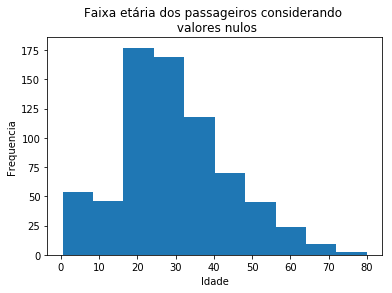

In [377]:
# Grafico de distribuição de idades dos passageiros considerando os valores nulos
ax = df_titanic['Age'].plot(kind='hist', title='Faixa etária dos passageiros considerando \n valores nulos')
ax.set_xlabel("Idade")
ax.set_ylabel("Frequencia");

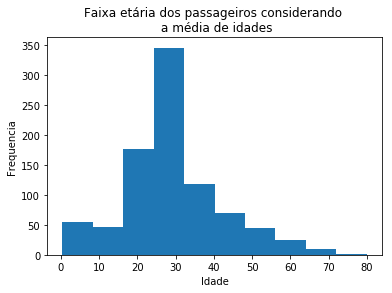

In [379]:
# Usando mean para preencher as idades faltantes
mean = df_titanic['Age'].mean()
df_titanic['Age'].fillna(mean, inplace=True)

# Grafico de distribuição de idades dos passageiros com o preenchimento dos campos nulos com a média de idades
ax = df_titanic['Age'].plot(kind='hist', title='Faixa etária dos passageiros considerando \n a média de idades')
ax.set_xlabel("Idade")
ax.set_ylabel("Frequencia");

In [380]:
# Verificando se os nulos foram preenchidos
df_titanic['Age'].isnull().sum()

0

In [381]:
# Estatísticas do Dataframe: Média de idade
df_titanic['Age'].mean()

29.699117647058763

In [382]:
# Estatísticas do Dataframe: Média de idade dos sobreviventes
df_titanic[df_titanic['Survived']== 1].mean()['Age']

28.54977812177503

In [383]:
# Estatísticas do Dataframe: Média de idade dos mortos
df_titanic[df_titanic['Survived']== 0].mean()['Age']

30.415099646415896

In [384]:
# Estatísticas do Dataframe: Média de idade dos homens
df_titanic[df_titanic['Sex']== 'male'].mean()['Age']

30.50582424304206

In [385]:
# Estatísticas do Dataframe: Média de idade das mulheres
df_titanic[df_titanic_cleaned['Sex']== 'female'].mean()['Age']

28.216730048707397

In [386]:
# Deixando o dataframe apenas com as colunas que interessam para as próximas análises
df_titanic_subset = df_titanic.iloc[:, np.r_[0:5]]
df_titanic_cleaned = df_titanic_subset.drop(columns=['Name'], axis=1)
df_titanic_cleaned.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [387]:
# Totais para Homens
df_titanic_cleaned[df_titanic_cleaned['Sex']=='male'].count()

Survived    577
Pclass      577
Sex         577
Age         577
dtype: int64

In [388]:
# Totais para Mulheres
df_titanic_cleaned[df_titanic_cleaned['Sex']=='female'].count()

Survived    314
Pclass      314
Sex         314
Age         314
dtype: int64

In [389]:
# Organizando os Dataframes por gênero
df_titanic_m = df_titanic_cleaned[df_titanic_cleaned['Sex']=='male']
df_titanic_f = df_titanic_cleaned[df_titanic_cleaned['Sex']=='female']

## Data Analysis and conclusions

### Analisando os dados e tirando conclusões

A partir desta seção serão realizadas as análises mais aprofundadas no dataset, e serão tiradas algumas conclusões sobre os resultados obtidos.

### Sobreviventes e Mortos por gênero (Homens e Mulheres)

In [390]:
# Numeros de Sobrevivência de Homens
df_titanic_m.groupby('Survived').count()['Sex']

Survived
0    468
1    109
Name: Sex, dtype: int64

In [391]:
# Proporção de Sobrevivência de Homens
df_titanic_m.groupby('Survived').count()['Sex'] / df_titanic_m.count()['Sex'] * 100

Survived
0    81.109185
1    18.890815
Name: Sex, dtype: float64

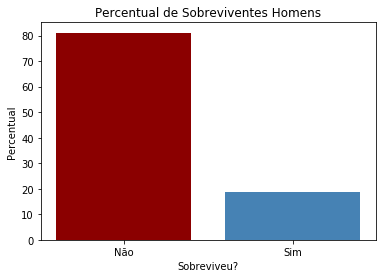

In [392]:
# Grafico de barras
df = (df_titanic_m.groupby('Survived').count()['Sex'] / df_titanic_m.count()['Sex'] * 100).tolist()
plt.bar([1,2], df, color=['darkred','steelblue'])
plt.xticks([1,2], ['Não','Sim'])
plt.title('Percentual de Sobreviventes Homens')
plt.xlabel('Sobreviveu?')
plt.ylabel('Percentual');

De acordo com o gráfico acima, observamos que 81% dos *homens* (passageiros do gênero masculino) não conseguiram sobreviver, enquanto apenas 18.8% sobreviveram, considerando adultos e crianças.

In [393]:
# Numeros de Sobrevivência de Mulheres
df_titanic_f.groupby('Survived').count()['Sex']

Survived
0     81
1    233
Name: Sex, dtype: int64

In [394]:
# Proporção de Sobrevivência de Mulheres
df_titanic_f.groupby('Survived').count()['Sex'] / df_titanic_f.count()['Sex'] * 100

Survived
0    25.796178
1    74.203822
Name: Sex, dtype: float64

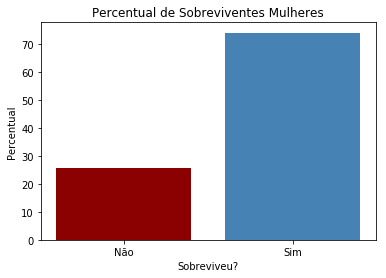

In [395]:
# Grafico de barras
df = (df_titanic_f.groupby('Survived').count()['Sex'] / df_titanic_f.count()['Sex'] * 100).tolist()
plt.bar([1,2], df, color=['darkred','steelblue'])
plt.xticks([1,2],['Não','Sim'])
plt.title('Percentual de Sobreviventes Mulheres')
plt.xlabel('Sobreviveu?')
plt.ylabel('Percentual');

De acordo com o gráfico acima, observamos que 25.7% das *mulheres* (passageiras do gênero feminino) não conseguiram sobreviver, enquanto a maioria 74.2% sobreviveu, considerando entre adultos e crianças. 

In [396]:
# Proporção de sobreviventes homens do total de passageiros (homens e mulheres)
df_titanic_m.groupby('Survived').count()['Sex'] / df_titanic.count()['Sex'] * 100

Survived
0    52.525253
1    12.233446
Name: Sex, dtype: float64

In [397]:
# Proporção de sobreviventes mulheres do total de passageiros (homens e mulheres)
df_titanic_f.groupby('Survived').count()['Sex'] / df_titanic.count()['Sex'] * 100

Survived
0     9.090909
1    26.150393
Name: Sex, dtype: float64

In [398]:
# Organizando o Dataframe de Sobreviventes
df_survived = df_titanic.query('Survived == 1')
df_survived['Sex'].count()

342

In [399]:
# Proporção de Sobreviventes por Gênero
df_survived.groupby('Sex').count()['Survived'] / df_titanic.count()['Sex'] * 100

Sex
female    26.150393
male      12.233446
Name: Survived, dtype: float64

In [400]:
# Proporção de sobreviventes sobre todos os passageiros do navio
df_survived.groupby('Survived').count()['Sex'] / df_titanic.count()['Sex'] * 100

Survived
1    38.383838
Name: Sex, dtype: float64

In [401]:
lst_survived = [df_titanic_m.groupby('Survived').count()['Sex'][1], df_titanic_f.groupby('Survived').count()['Sex'][1]]

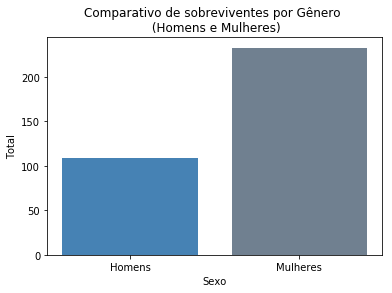

In [402]:
# Comparativo de sobreviventes por Gênero (Homens x Mulheres)
plt.bar([1,2], lst_survived, color=['steelblue','slategrey'])
plt.xticks([1,2],['Homens','Mulheres'])
plt.title('Comparativo de sobreviventes por Gênero \n (Homens e Mulheres)')
plt.xlabel('Sexo')
plt.ylabel('Total');

# Sobreviventes por Gênero
#df_titanic_s['Sex'].value_counts().plot(kind='bar');

### Conclusões sobre a relação entre sobrevivência e o gênero dos passageiros
Concluímos que a maior proporção de sobreviventes foram as mulheres. A taxa de sobrevivência das mulheres ficou um pouco acima do dobro da taxa de sobreviventes homens:

#### Estatísticas:
- Total de passageiros = 891
- Total de sobreviventes = 342 (38%)
- Sobreviventes Homens = 109 (12%)
- Sobreviventes Mulheres = 233 (26%)

Podemos afirmar até aqui, de acordo com os dados disponíveis analisados, que o gênero foi um dos fatores decisivos na sobrevivência ao naufrágio.

### Sobreviventes e Mortos por Classe

In [403]:
# Preparação dos Dataframes de sobreviventes e mortos
df_titanic_s = df_titanic_cleaned[df_titanic_cleaned['Survived']== 1]
df_titanic_m = df_titanic_cleaned[df_titanic_cleaned['Survived']== 0]

In [404]:
# Verificando o total de passageiros por Classe
df_titanic.groupby('Pclass').count()['Survived']

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [405]:
# Sobreviventes por Classe
df_titanic_s.groupby('Pclass').count()['Survived']

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [406]:
# Mortos por Classe
df_titanic_m.groupby('Pclass').count()['Survived']

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

In [407]:
# Proporção de Sobreviventes por Classe
df_titanic_s.groupby('Pclass').count()['Survived'] / df_titanic_s.count()['Survived'] * 100

Pclass
1    39.766082
2    25.438596
3    34.795322
Name: Survived, dtype: float64

Nota: Os que mais sobreviveram estavam na 1.ª classe (39.8%)

In [408]:
# Proporção de Mortos por Classe
df_titanic_m.groupby('Pclass').count()['Survived'] / df_titanic_m.count()['Survived'] * 100

Pclass
1    14.571949
2    17.668488
3    67.759563
Name: Survived, dtype: float64

Nota: Os que mais morreram estavam na 3.ª classe (67.8%)

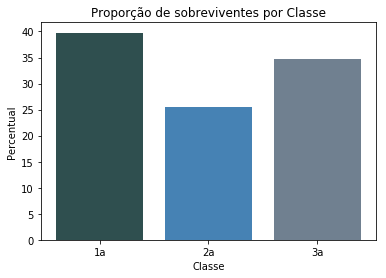

In [409]:
# Grafico de barras
df = (df_titanic_s.groupby('Pclass').count()['Survived'] / df_titanic_s.count()['Survived'] * 100).tolist()
plt.bar([1,2,3], df, color=['darkslategrey','steelblue', 'slategrey'])
plt.xticks([1,2,3],['1a','2a', '3a'])
plt.title('Proporção de sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Percentual');

De acordo com o gráfico acima, dentre os passageiros que sobreviveram, os da 1.ª classe (sem distinção por gênero) foram os que mais sobreviveram. Observa-se que ***39.8%*** de 1.ª classe conseguiram sobreviver, enquanto ***25.4%*** da 2.ª classe e ***34.8%*** de sobreviventes da 3.ª classe, proporcionalmente em suas classes. De acordo com esta primeira análise, observamos que não houve essencialmente como fator decisivo de sobrevivência, a relação de classe do passageiro. Porém, em termos proporcionais, os passageiros da 1.ª classe tiveram uma melhor taxa de sobrevivência.

In [410]:
# Proporção de Sobreviventes por Classe do total de passageiros (homens e mulheres)
df_titanic_s.groupby('Pclass').count()['Survived'] / df_titanic.count()['Survived'] * 100

Pclass
1    15.263749
2     9.764310
3    13.355780
Name: Survived, dtype: float64

Nota: A 1.ª classe se mantém com o melhor índice de sobrevivência (15.3%)

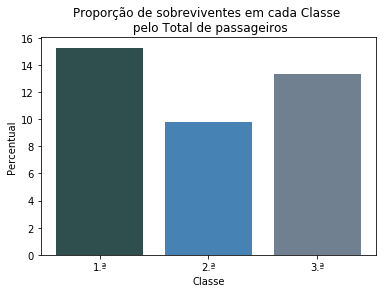

In [411]:
# Grafico de barras
df = (df_titanic_s.groupby('Pclass').count()['Survived'] / df_titanic.count()['Survived'] * 100).tolist()
plt.bar([1,2,3], df, color=['darkslategrey','steelblue', 'slategrey'])
plt.xticks([1,2,3],['1.ª','2.ª', '3.ª'])
plt.title('Proporção de sobreviventes em cada Classe \n pelo Total de passageiros')
plt.xlabel('Classe')
plt.ylabel('Percentual');

Observa-se que mesmo em relação ao total de passageiros, as proporções são basicamente mantidas, confirmando a análise acima de que o fator classe não foi tão determinante para a sobrevivência de passageiros. Tendo é claro, percentuais inferiores de sobreviventes em relação ao total, do que proporcionalmente dentro de cada classe.

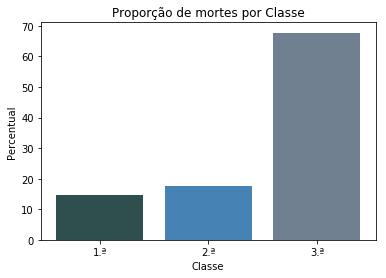

In [412]:
# Grafico de barras
df = (df_titanic_m.groupby('Pclass').count()['Survived'] / df_titanic_m.count()['Survived'] * 100).tolist()
plt.bar([1,2,3], df, color=['darkslategrey','steelblue', 'slategrey'])
plt.xticks([1,2,3],['1.ª','2.ª','3.ª'])
plt.title('Proporção de mortes por Classe')
plt.xlabel('Classe')
plt.ylabel('Percentual');

Em relação às mortes, cerca de **68%** dos passageiros da 3.ª classe não conseguiram sobreviver, enquanto que as taxas das classes superiores, observa-se significativa redução de mortes (**17.6%** na 2.ª classe e **14.5%** na 1.ª classe).

** Podemos concluir que termos proporcionais, a 1.ª e a 3.ª classes mantiveram seus % aproximados, porém quando observamos os números totais, a quantidade de mortos foi bem superior na 3.ª classe. **

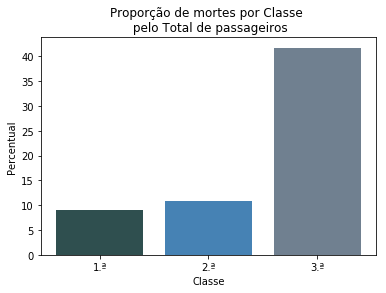

In [413]:
# Grafico de barras
df = (df_titanic_m.groupby('Pclass').count()['Survived'] / df_titanic.count()['Survived'] * 100).tolist()
plt.bar([1,2,3], df, color=['darkslategrey','steelblue', 'slategrey'])
plt.xticks([1,2,3],['1.ª','2.ª','3.ª'])
plt.title('Proporção de mortes por Classe \n pelo Total de passageiros')
plt.xlabel('Classe')
plt.ylabel('Percentual');

No gráfico acima observa-se disposição proporcional semelhante em relação às mortes por classe (gráfico anterior).

** Conclui-se que a classe foi um fator determinante nas mortes dos passageiros. As classes mais altas tiveram as menores taxas entre os mortos em relação a classe mais baixa. **

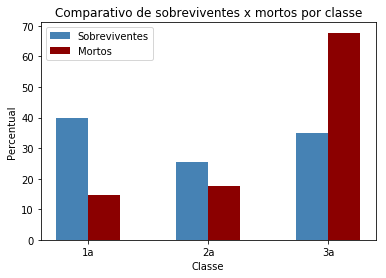

In [414]:
# Grafico comparativo de sobreviventes x mortos por classe
df_s = (df_titanic_s.groupby('Pclass').count()['Survived'] / df_titanic_s.count()['Survived'] * 100).tolist()
df_m = (df_titanic_m.groupby('Pclass').count()['Survived'] / df_titanic_m.count()['Survived'] * 100).tolist()
plt.bar([1,4,7], df_s, color=['steelblue'], label='Sobreviventes')
plt.bar([1.8,4.8,7.8], df_m, color=['darkred'], label='Mortos')
plt.xticks([1.4,4.4,7.4],['1a','2a','3a'])
plt.legend()
plt.title('Comparativo de sobreviventes x mortos por classe')
plt.xlabel('Classe')
plt.ylabel('Percentual');

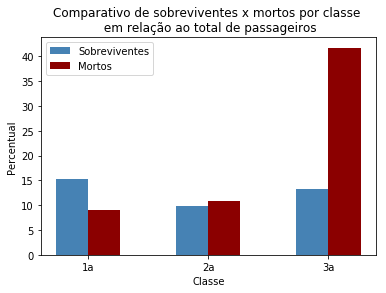

In [415]:
# Grafico comparativo de sobreviventes x mortos por classe do total de passageiros (homens e mulheres)
df_s = (df_titanic_s.groupby('Pclass').count()['Survived'] / df_titanic.count()['Survived'] * 100).tolist()
df_m = (df_titanic_m.groupby('Pclass').count()['Survived'] / df_titanic.count()['Survived'] * 100).tolist()
plt.bar([1,4,7], df_s, color=['steelblue'], label='Sobreviventes')
plt.bar([1.8,4.8,7.8], df_m, color=['darkred'], label='Mortos')
plt.xticks([1.4,4.4,7.4],['1a','2a','3a'])
plt.legend()
plt.title('Comparativo de sobreviventes x mortos por classe \n em relação ao total de passageiros')
plt.xlabel('Classe')
plt.ylabel('Percentual');

### Conclusões sobre a relação entre sobrevivência e morte dos passageiros por Classe
Observa-se que a maior proporção de sobreviventes estavam presente na 1.ª classe, e em contrapartida, a maioria das mortes ocorreu com passageiros da 3.ª classe. A relação entre as taxas de sobrevivência e morte da 2.ª classe ficaram relativamente próximas.

#### Estatísticas:
- Total de passageiros = 891
- Total de sobreviventes = 342 (38%)
***
- Total de passageiros na 1.ª Classe = 216
- Total de passageiros na 2.ª Classe = 184
- Total de passageiros na 3.ª Classe = 491
***
- Sobreviventes na 1.ª Classe = 136 (39.7%)
- Sobreviventes na 2.ª Classe =  87 (25.4%)
- Sobreviventes na 3.ª Classe = 119 (34.8%)
***
- Mortos na 1.ª Classe =  80 (14.5%)
- Mortos na 2.ª Classe =  97 (17.6%)
- Mortos na 3.ª Classe = 372 (67.8%)

** De acordo com os dados analisados, podemos afirmar que dentro destes parâmetros, a classe foi um dos fatores determinantes para a sobrevivência dos passageiros. **

### Sobreviventes e Mortos por Gênero (Homens e Mulheres) e Classe

In [416]:
# Preparação dos dados de sobreviventes e mortos Homens
df_titanic_s_h = df_titanic_s[df_titanic_s['Sex'] == 'male']
df_titanic_m_h = df_titanic_m[df_titanic_m['Sex'] == 'male']

# Preparação dos dados de sobreviventes e mortos Mulheres
df_titanic_s_m = df_titanic_s[df_titanic_s['Sex'] == 'female']
df_titanic_m_m = df_titanic_m[df_titanic_m['Sex'] == 'female']

In [417]:
# Sobreviventes Homens por Classe
df_titanic_s_h.groupby('Pclass').count()['Survived']

Pclass
1    45
2    17
3    47
Name: Survived, dtype: int64

In [418]:
# Mortos Homens por Classe
df_titanic_m_h.groupby('Pclass').count()['Survived']

Pclass
1     77
2     91
3    300
Name: Survived, dtype: int64

In [419]:
# Proporção de Sobreviventes Homens por Classe
df_titanic_s_h.groupby('Pclass').count()['Survived'] / df_titanic_s_h.count()['Survived'] * 100

Pclass
1    41.284404
2    15.596330
3    43.119266
Name: Survived, dtype: float64

In [420]:
# Proporção de mortos Homens por Classe
df_titanic_m_h.groupby('Pclass').count()['Survived'] / df_titanic_m_h.count()['Survived'] * 100

Pclass
1    16.452991
2    19.444444
3    64.102564
Name: Survived, dtype: float64

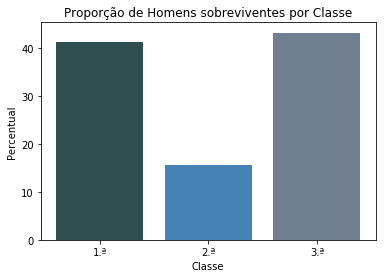

In [421]:
# Grafico de barras
df = (df_titanic_s_h.groupby('Pclass').count()['Survived'] / df_titanic_s_h.count()['Survived'] * 100).tolist()
plt.bar([1,2,3], df, color=['darkslategrey','steelblue', 'slategrey'])
plt.xticks([1,2,3],['1.ª','2.ª', '3.ª'])
plt.title('Proporção de Homens sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Percentual');

Observamos que dentre os passageiros **homens** e apenas sobre os números daqueles que sobreviveram, que os da 3.ª classe tiveram um valor proporcional mais alto de sobrevivência (**43.1%**), enquanto que ***15.6%*** na 2.ª classe e ***41.3%*** na 1.ª classe. 

Dentro deste cenário, observamos que não podemos afirmar como fator decisivo de sobrevivência, a relação de classe e passageiros do gênero masculino. Verificamos que para os homens, olhando apenas sobre este prisma, a classe não foi um fator determinante para a sobrevivência.

In [422]:
# Proporção de sobreviventes Homens por classe
df_titanic_s_h.groupby('Pclass').count()['Survived'] / df_titanic.count()['Survived'] * 100

Pclass
1    5.050505
2    1.907969
3    5.274972
Name: Survived, dtype: float64

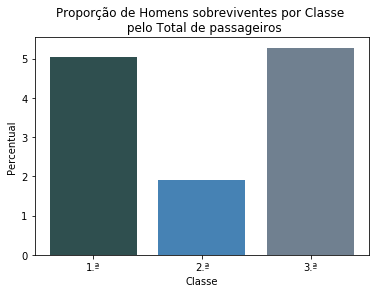

In [423]:
# Grafico de barras
df = (df_titanic_s_h.groupby('Pclass').count()['Survived'] / df_titanic.count()['Survived'] * 100).tolist()
plt.bar([1,2,3], df, color=['darkslategrey','steelblue', 'slategrey'])
plt.xticks([1,2,3],['1.ª','2.ª', '3.ª'])
plt.title('Proporção de Homens sobreviventes por Classe \n pelo Total de passageiros')
plt.xlabel('Classe')
plt.ylabel('Percentual');

No gráfico acima observa-se uma disposição proporcional semelhante na relação de sobreviventes **homens** por classe (gráfico anterior). Mantém-se nesta segunda visão, que os sobreviventes da 3.ª classe são em proporção, superiores aos sobreviventes das demais classes.

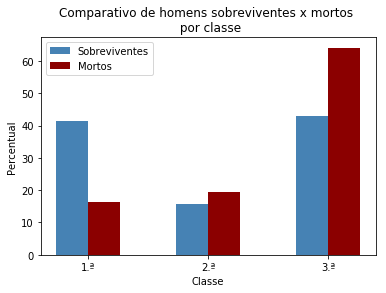

In [424]:
# Grafico comparativo de homens sobreviventes x mortos por classe
df_s = (df_titanic_s_h.groupby('Pclass').count()['Survived'] / df_titanic_s_h.count()['Survived'] * 100).tolist()
df_m = (df_titanic_m_h.groupby('Pclass').count()['Survived'] / df_titanic_m_h.count()['Survived'] * 100).tolist()
plt.bar([1,4,7], df_s, color=['steelblue'], label='Sobreviventes')
plt.bar([1.8,4.8,7.8], df_m, color=['darkred'], label='Mortos')
plt.xticks([1.4,4.4,7.4],['1.ª','2.ª','3.ª'])
plt.legend()
plt.title('Comparativo de homens sobreviventes x mortos \n por classe')
plt.xlabel('Classe')
plt.ylabel('Percentual');

### Conclusões sobre a relação entre sobrevivência e morte dos passageiros homens
Nesta visao, fica fácil perceber que mesmo tendo um grande número de sobreviventes na 3.ª classe, a 1.ª classe teve melhor taxa de sobrevivencia se comparando com as mortes. A 2.ª classe, mesmo tendo o número de mortos maior que o de sobrevivenetes, ainda se mantém em posição melhor se compararmos os números da 3.ª classe, que teve um numero muito mais expressivo de mortes.

Apesar de nas visoes anteriores, proporcionalmente dentro da 3.ª classe, o número de sobreviventes em relação às demais classes foi maior, aqui fica claro que a classe entre os homens foi um fator determinante para a sobrevivencia.

Observa-se que a 2.ª classe teve o pior resultado proporcional, tendo em vista que o número de sobreviventes e mortos ficaram próximos. Já a 1.ª classe teve o melhor resultado se comparamos os números de sobreviventes x mortos.

#### Estatísticas:
- Total de passageiros = 891
- Total de sobreviventes = 342 (38%)
- Sobreviventes Homens = 109 (12%)
***
- Total de passageiros na 1.ª Classe = 216
- Total de passageiros na 2.ª Classe = 184
- Total de passageiros na 3.ª Classe = 491
***
- Sobreviventes na 1.ª Classe = 136 (39.7%)
- Sobreviventes na 2.ª Classe =  87 (25.4%)
- Sobreviventes na 3.ª Classe = 119 (34.8%)
***
- Mortos na 1.ª Classe =  80 (14.5%)
- Mortos na 2.ª Classe =  97 (17.6%)
- Mortos na 3.ª Classe = 372 (67.8%)
***
- Sobreviventes ***homens*** na 1.ª Classe = 45 (41.3%)
- Sobreviventes ***homens*** na 2.ª Classe = 17 (15.6%)
- Sobreviventes ***homens*** na 3.ª Classe = 47 (43.1%)
***
- Mortos ***homens*** na 1.ª Classe =  77 (16.5%)
- Mortos ***homens*** na 2.ª Classe =  91 (19.4%)
- Mortos ***homens*** na 3.ª Classe = 300 (64.1%)

In [425]:
# Sobreviventes Mulheres por Classe
df_titanic_s_m.groupby('Pclass').count()['Survived']

Pclass
1    91
2    70
3    72
Name: Survived, dtype: int64

Nota: A maioria das mulheres sobreviventes está na 1.ª classe. Porém, observa-se que as demais classes mativeram um número muito aproximado de sobreviventes.

In [426]:
# Mortos Mulheres por Classe
df_titanic_m_m.groupby('Pclass').count()['Survived']

Pclass
1     3
2     6
3    72
Name: Survived, dtype: int64

Nota: Para as mulheres, a classe também foi um fator determinantes no número de mortes.

In [427]:
# Proporção de Mulheres Sobreviventes por Classe
df_titanic_s_m.groupby('Pclass').count()['Survived'] / df_titanic_s_m.count()['Survived'] * 100

Pclass
1    39.055794
2    30.042918
3    30.901288
Name: Survived, dtype: float64

In [428]:
# Proporção de Mulheres Mortas por Classe
df_titanic_m_m.groupby('Pclass').count()['Survived'] / df_titanic_m_m.count()['Survived'] * 100

Pclass
1     3.703704
2     7.407407
3    88.888889
Name: Survived, dtype: float64

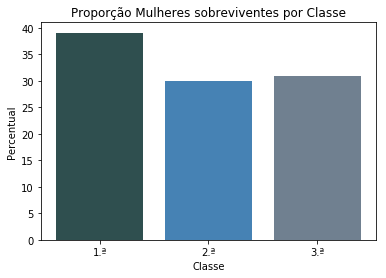

In [429]:
# Grafico de barras
df = (df_titanic_s_m.groupby('Pclass').count()['Survived'] / df_titanic_s_m.count()['Survived'] * 100).tolist()
plt.bar([1,2,3], df, color=['darkslategrey','steelblue', 'slategrey'])
plt.xticks([1,2,3],['1.ª','2.ª', '3.ª'])
plt.title('Proporção Mulheres sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Percentual');

Observamos que dentre as passageiras **mulheres** que sobreviveram, aquelas da 1.ª classe foram as que proporcionalmente, mais sobreviveram (**39.1%**), enquanto ***30%*** na 2.ª classe e ***30.9%*** sobreviveram na 3.ª classe. Podemos notar que os valores proporcionalmente ficaram bem próximos, e que a classe, não foi essencialmente o fator decisivo de sobrevivência, se olharmos por esta visão.

In [430]:
df_titanic_s_m.groupby('Pclass').count()['Survived'] / df_titanic.count()['Survived'] * 100

Pclass
1    10.213244
2     7.856341
3     8.080808
Name: Survived, dtype: float64

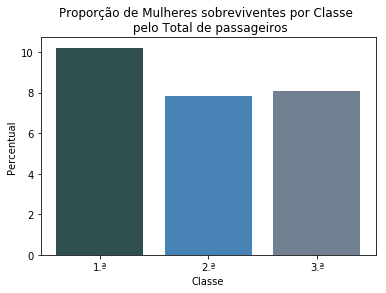

In [431]:
# Grafico de barras
df = (df_titanic_s_m.groupby('Pclass').count()['Survived'] / df_titanic.count()['Survived'] * 100).tolist()
plt.bar([1,2,3], df, color=['darkslategrey','steelblue', 'slategrey'])
plt.xticks([1,2,3],['1.ª','2.ª', '3.ª'])
plt.title('Proporção de Mulheres sobreviventes por Classe \n pelo Total de passageiros')
plt.xlabel('Classe')
plt.ylabel('Percentual');

No gráfico acima observa-se uma disposição proporcional semelhante em relação de sobreviventes de **mulheres** por classe (gráfico anterior). Verificamos nesta segunda visão, que os sobreviventes da 1.ª classe são em proporção, superiores aos sobreviventes das demais classes. Tendo a 2.ª classe o pior percentual de sobreviventes.

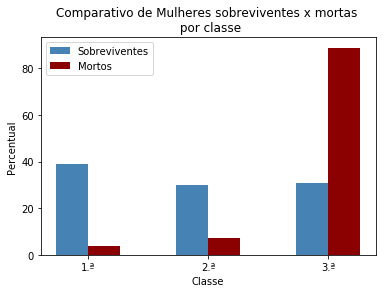

In [432]:
# Grafico comparativo de mulheres sobreviventes x mortos por classe
df_s = (df_titanic_s_m.groupby('Pclass').count()['Survived'] / df_titanic_s_m.count()['Survived'] * 100).tolist()
df_m = (df_titanic_m_m.groupby('Pclass').count()['Survived'] / df_titanic_m_m.count()['Survived'] * 100).tolist()
plt.bar([1,4,7], df_s, color=['steelblue'], label='Sobreviventes')
plt.bar([1.8,4.8,7.8], df_m, color=['darkred'], label='Mortos')
plt.xticks([1.4,4.4,7.4],['1.ª','2.ª','3.ª'])
plt.legend()
plt.title('Comparativo de Mulheres sobreviventes x mortas \n por classe')
plt.xlabel('Classe')
plt.ylabel('Percentual');

### Conclusões sobre a relação entre sobrevivência e morte dos passageiras mulheres por Classe
A conclusão que se chega é que proporcionalmente dentro das classes mais altas, o número de sobreviventes em relação à 3.ª classe foi mais relevante, mas não determinante. Os valores ficaram próximos proporcionalmente. 

Porém, quando observamos o comparativo de mortes nota-se que para a 3.ª classe, foi um valor substancial, o pior resultado. Muitas mulheres da 3.ª classe não conseguiram sobreviver (**89%**). Portanto para as mulheres, a classe foi um fator determinante no número de mortes, pois há uma enorme diferença entre as classes altas e a 3.ª classe.

#### Estatísticas:
- Total de passageiros = 891
- Total de sobreviventes = 342 (38%)
- Sobreviventes Mulheres = 233 (26%)
***
- Total de passageiros na 1.ª Classe = 216
- Total de passageiros na 2.ª Classe = 184
- Total de passageiros na 3.ª Classe = 491
***
- Sobreviventes na 1.ª Classe = 136 (39.7%)
- Sobreviventes na 2.ª Classe =  87 (25.4%)
- Sobreviventes na 3.ª Classe = 119 (34.8%)
***
- Mortos na 1.ª Classe =  80 (14.5%)
- Mortos na 2.ª Classe =  97 (17.6%)
- Mortos na 3.ª Classe = 372 (67.8%)
***
- Sobreviventes ***mulheres*** na 1.ª Classe = 91 (39.1%)
- Sobreviventes ***mulheres*** na 2.ª Classe = 70 (30.0%)
- Sobreviventes ***mulheres*** na 3.ª Classe = 72 (30.9%)
***
- Mortos ***mulheres*** na 1.ª Classe =   3 ( 3.7%)
- Mortos ***mulheres*** na 2.ª Classe =   6 ( 7.4%)
- Mortos ***mulheres*** na 3.ª Classe =  72 (88.9%)

### Sobreviventes e Mortos por Faixa Etária (Idade) 
- Sobreviventes e Mortos por faixa etária 
- Homens e Mulheres por Idade  
- Relação entre a Idade e o Valor Pago na Passagem 
- Outliers

### Total de Sobreviventes e Mortos
- ```df_titanic_s['Age'].count()``` #342
- ```df_titanic_m['Age'].count()``` #577

### % de Sobreviventes e Mortos
- ```df_titanic_s.groupby('Survived').count()['Age'] / df_titanic.count()['Survived'] * 100``` #38.383838
- ```df_titanic_m.groupby('Survived').count()['Age'] / df_titanic.count()['Survived'] * 100``` #61.616162


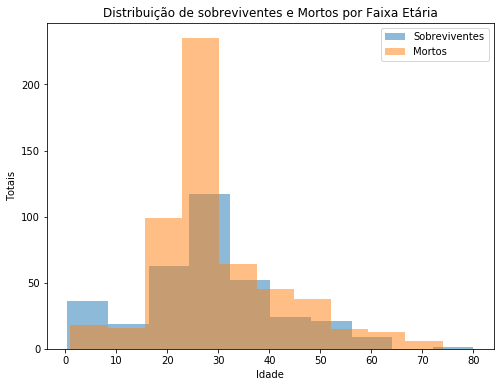

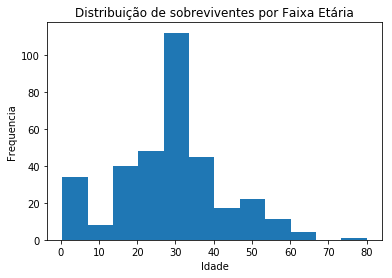

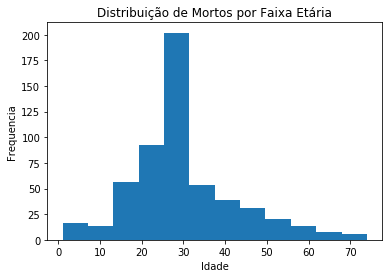

In [433]:
# Gráfico de Distribuição de sobreviventes por idade (Histograma)
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(df_titanic_s['Age'], alpha=0.5, label='Sobreviventes')
ax.hist(df_titanic_m['Age'], alpha=0.5, label='Mortos')
ax.set_title('Distribuição de sobreviventes e Mortos por Faixa Etária')
ax.set_xlabel('Idade')
ax.set_ylabel('Totais')
ax.legend(loc='upper right')
plt.show()

# Sobreviventes
plt.hist(df_titanic_s['Age'], bins=12)
plt.title('Distribuição de sobreviventes por Faixa Etária')
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.show()

# Mortos
plt.hist(df_titanic_m['Age'], bins=12)
plt.title('Distribuição de Mortos por Faixa Etária')
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.show()

Observa-se que a grande maioria de mortos (61.1% contra 38.4% de sobreviventes), está dentro da faixa etária média (**28.5** anos) entre 20 e 30 anos. Um pequeno grupo de passageiros entre pouco mais de 70 a 80 anos sobreviveram.

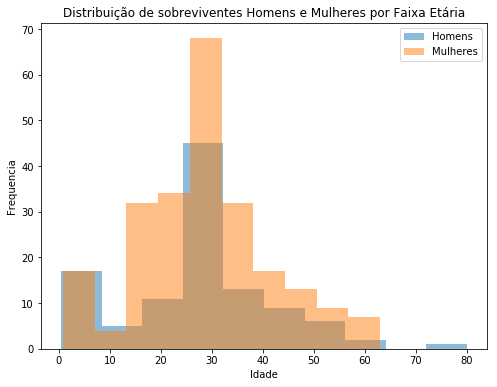

In [434]:
# Gráfico de Distribuição de sobreviventes homens x mulheres por Idade
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(df_titanic_s_h['Age'], alpha=0.5, label='Homens')
ax.hist(df_titanic_s_m['Age'], alpha=0.5, label='Mulheres')
ax.set_title('Distribuição de sobreviventes Homens e Mulheres por Faixa Etária')
ax.set_xlabel('Idade')
ax.set_ylabel('Frequencia')
ax.legend(loc='upper right')
plt.show()

As crianças entre 0 a pouco mais de 10 anos (meninos e meninas) tiveram praticamente o mesmo número de sobreviventes.

O Total de sobreviventes mulheres com pouco mais de 10 anos até a faixa dos 60 foi bem superior ao total de homens sobreviventes, tendo como a faixa dos 30 anos (média de **28.9** anos para as mulheres sobreviventes) aquela teve o maior número de sobreviventes. Alguns poucos passageiros homens na faixa dos 70-80 anos sobreviveram.

**Concluímos aqui que realmente mulheres e crianças salvaram-se primeiro.**

### Correlação de Mortos entre Classe e Faixa Etária

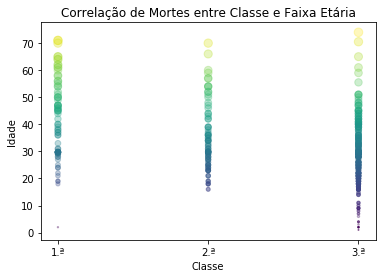

In [435]:
# Gráfico de correlação de morte entre Classe e Faixa Etária
plt.scatter(df_titanic_m['Pclass'], df_titanic_m['Age'], alpha=0.3, c=df_titanic_m['Age'], s=df_titanic_m['Age'])
plt.title('Correlação de Mortes entre Classe e Faixa Etária')
plt.xticks([1,2,3], ['1.ª','2.ª','3.ª'])
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.show()

O gráfico acima demonstra a distribuição de classes por faixa etária. Observa-se o grande número de crianças na 3.ª classe, onde apesar do índice de mortes ter sido alto, muitas crianças foram salvas.

## Relações envolvendo o Valor da Tarifa (Fare)

### Classe e Tarifa

Podemos verificar a relação entre Classe e o valor pago pela Tarifa. A média de custo da tarifa foi de \$32.2

In [436]:
# Tarifa Média
df_titanic['Fare'].mean()

32.2042079685746

In [437]:
# Valor médio da tarifa
df_titanic.groupby(['Pclass']).mean()['Fare']

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

### Idade e Tarifa
Observa-se a distribuição da Tarifa pela Faixa Etária

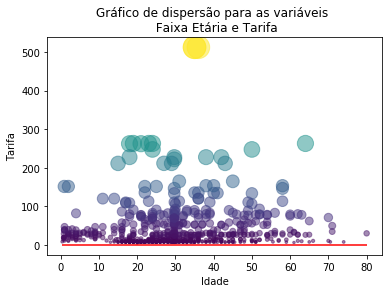

In [478]:
# Relação entre a idade e o valor pago da Tarifa
plt.scatter(df_titanic['Age'], df_titanic['Fare'], alpha=0.5, c=df_titanic['Fare'], s=df_titanic['Fare'])
plt.hlines(y=0, xmin=df_titanic['Age'].min(), xmax=df_titanic['Age'].max(), color='red')
plt.title('Gráfico de dispersão para as variáveis \n Faixa Etária e Tarifa')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.show()

#### Nota-se o quanto a correlação é fraca entre `Age` e `Fare`: 0.09 (positiva e fraca)

In [476]:
# Verificando a correlação entre as duas variáveis: Age e Fare
df_titanic[['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.091566
Fare,0.091566,1.000000


No gráfico de dispersão acima, observa-se que não há uma correlação direta entre idade e o valor pago na tarifa, contudo indica que as passagens mais caras foram adquiridas pelas faixas de idades entre 30-40 anos (cor amarela), e uma faixa de 20-50 com valores acima de \$200 (cor verde), porém a grande maioria dos passageiros adquiriu as tafifas mais baratas (abaixo de \$100), indicando que além das classes mais baixas pagaram também, a 2.ª e a 3.ª classe, dentro da média de valores (\$32). A linha de melhor ajuste, ou linha de regressão linear, na horizontal atesta a não correlação entre as variáveis.

### Valor total da Tarifa agrupado por Classe, Local de Embarque (porto) e Gênero

In [439]:
# Agrupamento por Classe, Porto e Gênero (contagem de passageiros)
df_titanic.groupby(by=['Pclass', 'Embarked', 'Sex'])['Name'].count()

Pclass  Embarked  Sex   
1       C         female     43
                  male       42
        Q         female      1
                  male        1
        S         female     50
                  male       79
2       C         female      7
                  male       10
        Q         female      2
                  male        1
        S         female     67
                  male       97
3       C         female     23
                  male       43
        Q         female     33
                  male       39
        S         female     88
                  male      265
Name: Name, dtype: int64

In [440]:
# Agrupamento por Classe, Porto e Gênero (soma das tarifas)
df_titanic['Embarked'] = df_titanic['Embarked'].replace(['C','Q','S'],['Cherbourg','Queenstown','Southampton'])
df_titanic.groupby(by=['Pclass', 'Embarked', 'Sex'])['Fare'].sum()

Pclass  Embarked     Sex   
1       Cherbourg    female    4972.5333
                     male      3928.5417
        Queenstown   female      90.0000
                     male        90.0000
        Southampton  female    4913.2917
                     male      4183.0458
2       Cherbourg    female     176.8792
                     male       254.2125
        Queenstown   female      24.7000
                     male        12.3500
        Southampton  female    1468.1500
                     male      1865.5500
3       Cherbourg    female     337.9833
                     male       402.1462
        Queenstown   female     340.1585
                     male       465.0458
        Southampton  female    1642.9668
                     male      3526.3945
Name: Fare, dtype: float64

#### Embarque (porto) x Classe
- Predominância de embarque nos portos por classe:
  - 1.ª classe predominatemente de passageiros que embarcaram em "Cherbourg" e "Southampton";
  - 2.ª classe embarques em "Southampton" predominantemente;
  - 3.ª classe embarques em "Southampton" e "Queenstown".

### Relação entre sobrevivência e tarifa não paga (gratuidade)
Aqueles que não pagaram tarifa sobreviveram? Nome dos sobreviventes?

In [444]:
df_titanic[df_titanic['Fare'] == 0]['Name'].tolist()

['Leonard, Mr. Lionel',
 'Harrison, Mr. William',
 'Tornquist, Mr. William Henry',
 'Parkes, Mr. Francis "Frank"',
 'Johnson, Mr. William Cahoone Jr',
 'Cunningham, Mr. Alfred Fleming',
 'Campbell, Mr. William',
 'Frost, Mr. Anthony Wood "Archie"',
 'Johnson, Mr. Alfred',
 'Parr, Mr. William Henry Marsh',
 'Watson, Mr. Ennis Hastings',
 'Knight, Mr. Robert J',
 'Andrews, Mr. Thomas Jr',
 'Fry, Mr. Richard',
 'Reuchlin, Jonkheer. John George']

In [445]:
# Listagem dos não pagantes (tarifa = 0)
df_titanic[df_titanic['Fare'] == 0].groupby(by=['Name', 'Age', 'Sex', 'Survived', 'Pclass'])['Fare'].sum()

Name                              Age        Sex   Survived  Pclass
Andrews, Mr. Thomas Jr            39.000000  male  0         1         0.0
Campbell, Mr. William             29.699118  male  0         2         0.0
Cunningham, Mr. Alfred Fleming    29.699118  male  0         2         0.0
Frost, Mr. Anthony Wood "Archie"  29.699118  male  0         2         0.0
Fry, Mr. Richard                  29.699118  male  0         1         0.0
Harrison, Mr. William             40.000000  male  0         1         0.0
Johnson, Mr. Alfred               49.000000  male  0         3         0.0
Johnson, Mr. William Cahoone Jr   19.000000  male  0         3         0.0
Knight, Mr. Robert J              29.699118  male  0         2         0.0
Leonard, Mr. Lionel               36.000000  male  0         3         0.0
Parkes, Mr. Francis "Frank"       29.699118  male  0         2         0.0
Parr, Mr. William Henry Marsh     29.699118  male  0         1         0.0
Reuchlin, Jonkheer. John George 

In [446]:
# Media de idade dos passageiros não pagantes (tarifa = 0)
df_titanic[df_titanic['Fare'] == 0].mean()['Age']

32.2395294117647

In [447]:
# Preparação dos dados de passageiros que não tiveram a tarifa cobrada
df_titanic_zerofare = df_titanic[df_titanic['Fare'] == 0]

# Nome dos passageiros que não tiveram a tarifa cobrada e sobreviveram
df_titanic_zerofare[df_titanic_zerofare['Survived'] == 1]['Name']

271    Tornquist, Mr. William Henry
Name: Name, dtype: object

Nota: Mr. William Henry Tornquist foi o único sobrevivente que não pagou tarifa.

### Curiosidade: Outliers são os mais idosos

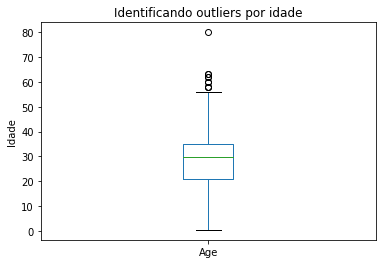

In [454]:
# Age Boxplot: Identificando outliers
ax = df_titanic_s['Age'].plot(kind='box', title='Identificando outliers por idade')
ax.set_ylabel("Idade");

In [455]:
# Sobrevivente Outliers com idade maior ou igual a 55
df_titanic_s[df_titanic_s['Age'] >= 55]

,Survived,Pclass,Sex,Age
11,1,1,female,58.0
15,1,2,female,55.0
195,1,1,female,58.0
268,1,1,female,58.0
275,1,1,female,63.0
366,1,1,female,60.0
483,1,3,female,63.0
570,1,2,male,62.0
587,1,1,male,60.0
630,1,1,male,80.0


In [456]:
# Sobrevivente Outlier com idade maior ou igual a 80
df_titanic[df_titanic['Age'] >= 80]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,Southampton


***
# Answering questions

## Respondendo aos questionamentos de acordo com as conclusões tiradas

#### Dentre os questionamentos propostos com este conjunto de dados, estas forma as respostas através das análises realizadas:

1 - Quais foram os fatores que fizeram com que algumas pessoas mais propensas a sobreviver?    
**R: Gênero e Classe**

2 - Será que a classe mais alta teve mais chances de sobrevivência que a mais baixa?  
**R: Sim, a 1.ª classe teve melhores chances de sobrevovência **

3 - A proporção de sobrevivência da primeira classe foi superior em relação à segunda e a terceira classe?  
**R: Sim **

- Sobreviventes na 1.ª Classe = 136 (39.7%)
- Sobreviventes na 2.ª Classe = 87 (25.4%)
- Sobreviventes na 3.ª Classe = 119 (34.8%)

4 - Há correlação direta entre os que sobreviveram e seus gêneros?  
**R:  Sim, mulheres tiveram os melhores índices de sobrevivência**

5 - Qual a proporção de sobreviventes e mortos por gênero?  
**R: Homens: Sobreviveram 19% (109) e Morreram 81% (468) | Mulheres: Sobreviveram 74% (233) e Morreram 26% (81) **

6 - Mulheres e crianças salvaram-se primeiro?  
**R: Sim, as análises quantitativas por idade e gênero apontaram que a distribuição de sobreviventes foi bastante significativa entre 0 e pouco mais de 10 anos (entre meninos e meninas) e entre as mulheres **

7 - Há correlação direta entre o valor pago na passagem e idade?  
**R: Sim, as passagens mais caras foram adquiridas pelas faixas de idades entre 30-40 anos (cor amarela), e uma faixa de 20-50. Houveram gratuidades para idades com média de 32 anos **

8 - Quem são os passageiros que não tiveram a tarifa cobrada? Eles sobreviveram?
**R: ** 'Leonard, Mr. Lionel', 'Harrison, Mr. William', 'Tornquist, Mr. William Henry', 'Parkes, Mr. Francis "Frank"',
 'Johnson, Mr. William Cahoone Jr', 'Cunningham, Mr. Alfred Fleming', 'Campbell, Mr. William', 'Frost, Mr. Anthony Wood "Archie"', 'Johnson, Mr. Alfred', 'Parr, Mr. William Henry Marsh', 'Watson, Mr. Ennis Hastings', 'Knight, Mr. Robert J', 'Andrews, Mr. Thomas Jr', 'Fry, Mr. Richard', 'Reuchlin, Jonkheer. John George'. ** Mr. William Henry Tornquist foi o único sobrevivente que não pagou tarifa. **

## Quais conclusões podemos tirar no naufrágio do Titanic?

Uma das razões pelas quais o naufrágio causou tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas tinham maior probabilidade de sobreviver do que outros, como mulheres, crianças e a classe alta.

### Conclusões

De acordo com a análise dos dados realizada, nota-se claramente que os passageiros das classes superiores foram privilegiados no momento de embarcarem nos botes salva vidas. 

- 67.7% dos mortos era da 3.ª classe, enquanto 17.6% da 2.ª classe e 14.5% da 1.ª classe;
- A idade média de sobreviventes era de 28.5 anos;
- Apenas 38.3% de passageiros sobreviveram ao naufrágio, sendo a maioria mulheres (26.2%).

### Limitações

Existiram fatores limitantes para a análise de algumas características, pois algumas propriedades não possuíam valores para alguns passageiros. As características afetadas e usadas na análise são: `Age` e `Embarked`

- Medida tomada:
  - **_Age_**: Os valore faltantes desta característica foram preenchidos com base na idade média dos passageiros, o que pode afetar os resultados da análises que envolvem idades;
  - **_Embarked_**: O local do embarque foi ajustado com base na estatística por selecionar um dos locais de embarque de maior frequencia (moda).

- Ajustou-se os nomes dos portos de embarque da característica `Embarked` para melhor legibilidade:  C=Cherbourg, Q=Queenstown e S=Southampton.

### Referências

Stackoverflow [https://stackoverflow.com/]  
Matplotlib [https://matplotlib.org/]  
Pandas [https://pandas.pydata.org/]  

##### Links

https://www.kaggle.com/c/titanic/data#  
https://paulovasconcellos.com.br/o-que-o-naufr%C3%A1gio-do-titanic-nos-ensina-at%C3%A9-hoje-data-science-project-2fea8ff1c9b5  
https://github.com/paulozip/naufragio-titanic  
https://github.com/pandas-dev/pandas/issues/10611  
https://www.youtube.com/watch?v=LKESQMPe7nI  
https://www.youtube.com/watch?v=3eTSVGY_fIE  
http://felipegalvao.com.br/blog/2016/03/08/visualizacao-de-dados-com-python-matplotlib/  
https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html  
https://www.kaggle.com/c/titanic  
https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet  

### Bibliografia
Data Science do Zero - Grus - O'Reilly  
Python para Análise de Dados - McKinney - O'Reilly | novatec